
Load input features..

Load distance maps features..

Some cross checks on data loading..

Find the number of input channels..

Split into training and validation set (4%)..
Total validation proteins =  8
Total training proteins =  192

Prepare the validation input and outputs..
(8, 256, 256, 13)
(8, 256, 256, 1)

Prepare the training input and outputs..
(192, 256, 256, 13)
(192, 256, 256, 1)

Sanity check input features values..
 First validation protein:
 Channel        Avg        Max        Sum
       0     0.4457     0.9970    29210.6
       1     0.4457     0.9970    29210.6
       2     0.3147     0.9930    20622.6
       3     0.3147     0.9930    20622.6
       4     0.2157     0.9920    14137.9
       5     0.2157     0.9920    14137.9
       6     0.2594     0.8880    17002.8
       7     0.2594     0.8880    17002.8
       8     0.6736     0.9460    44145.7
       9     0.6736     0.9460    44145.7
      10     0.1118     1.0000     7324.6
      11     0.1328     5.9985    

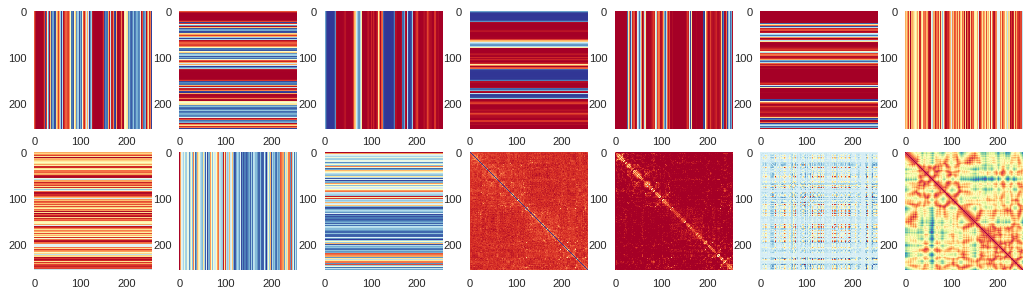

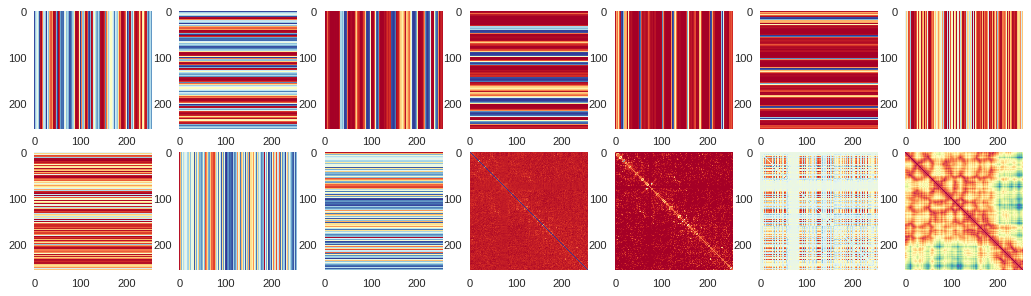

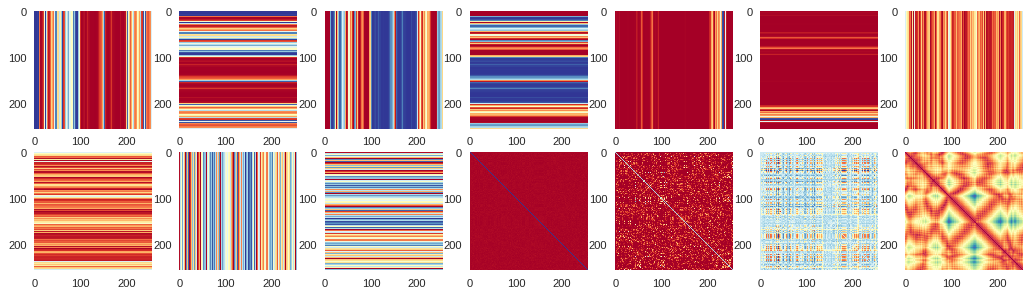

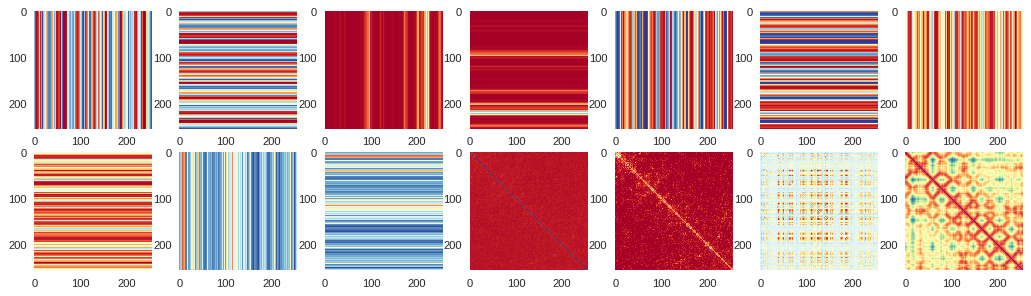


Build a model..
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 256, 256, 13)      0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 256, 256, 13)      52        
_________________________________________________________________
activation_10 (Activation)   (None, 256, 256, 13)      0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 256, 256, 64)      7552      
_________________________________________________________________
activation_11 (Activation)   (None, 256, 256, 64)      0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 256, 256, 64)      36928     
_________________________________________________________________
activation_12 (Activation)   (None, 256, 256, 64)      0   

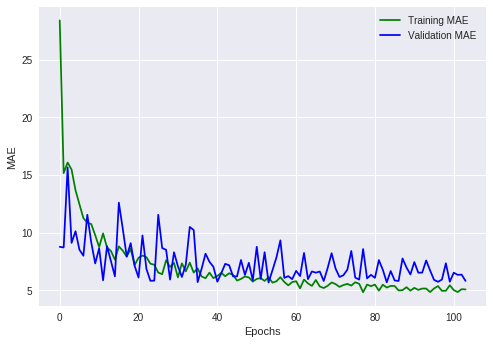


Load the best weights..

Make predictions..

Compare the predictions with the truths (for some proteins) ..


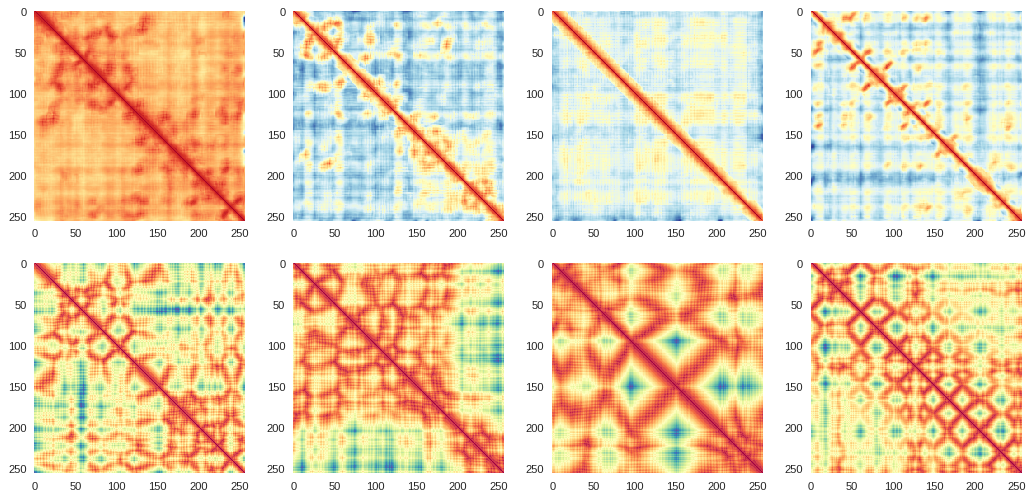


MAE of top L long-range distance predictions on the validation set..
MAE for 0 - 12asA0 = 3.80


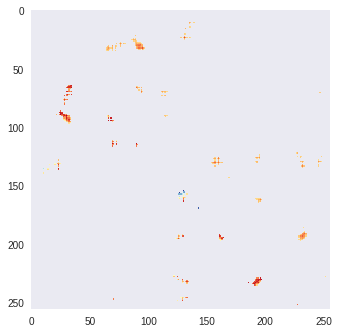

MAE for 1 - 16pkA0 = 4.04


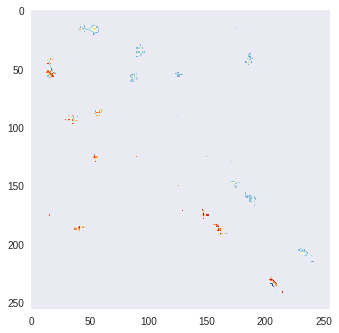

MAE for 2 - 16vpA0 = 7.47


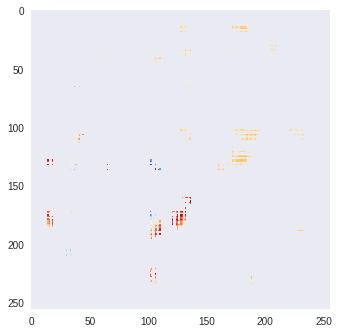

MAE for 3 - 1a0tP0 = 5.59


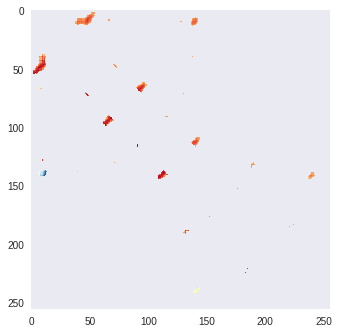

MAE for 4 - 1a2zA0 = 3.33
MAE for 5 - 1a8rA0 = 2.68
MAE for 6 - 1ahsA0 = 4.60
MAE for 7 - 1aihA0 = 2.97
Average MAE = 4.31

Precision of top L long-range distance predictions on the validation set..
Precision for 0 - 12asA0 256 [0/339.0] = 0.00 
Precision for 1 - 16pkA0 256 [1/386.0] = 0.00 
Precision for 2 - 16vpA0 256 [0/267.0] = 0.00 
Precision for 3 - 1a0tP0 256 [6/301.0] = 0.02 
Precision for 4 - 1a2zA0 220 [6/439.0] = 0.01 
Precision for 5 - 1a8rA0 221 [19/295.0] = 0.06 
Precision for 6 - 1ahsA0 126 [0/200.0] = 0.00 
Precision for 7 - 1aihA0 170 [21/147.0] = 0.14 
Average Precision = 0.03

Evaluate on the test dataset..

MAE of top L long-range distance predictions on the test set..
MAE for 0 - 1a3aA = 1.90


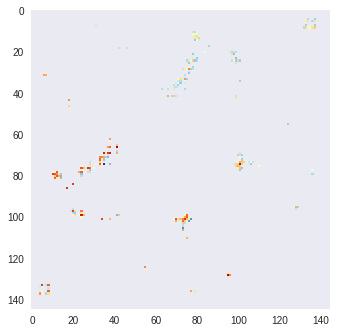

MAE for 1 - 1a6mA = 2.19


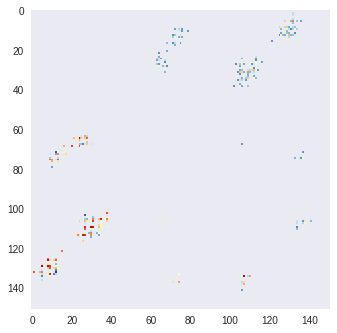

MAE for 2 - 1a70A = 2.87


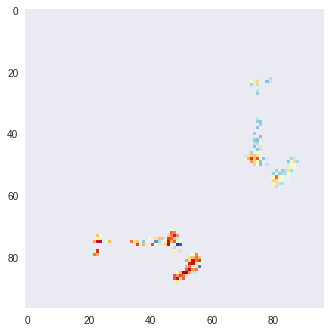

MAE for 3 - 1aapA = 3.27


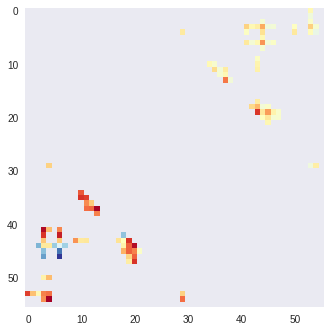

MAE for 4 - 1abaA = 2.48
MAE for 5 - 1ag6A = 2.59
MAE for 6 - 1aoeA = 1.82
MAE for 7 - 1atlA = 5.24
MAE for 8 - 1atzA = 3.47
MAE for 9 - 1avsA = 2.34
MAE for 10 - 1bdoA = 3.11
MAE for 11 - 1bebA = 4.12
MAE for 12 - 1behA = 4.03
MAE for 13 - 1bkrA = 2.75
MAE for 14 - 1brfA = 2.79
MAE for 15 - 1bsgA = 2.03
MAE for 16 - 1c44A = 4.32
MAE for 17 - 1c52A = 2.32
MAE for 18 - 1c9oA = 3.49
MAE for 19 - 1cc8A = 2.02
MAE for 20 - 1chdA = 2.44
MAE for 21 - 1cjwA = 1.91
MAE for 22 - 1ckeA = 2.41
MAE for 23 - 1ctfA = 2.91
MAE for 24 - 1cxyA = 3.30
MAE for 25 - 1cznA = 2.73
MAE for 26 - 1d0qA = 2.38
MAE for 27 - 1d1qA = 1.92
MAE for 28 - 1d4oA = 3.74
MAE for 29 - 1dbxA = 2.39
MAE for 30 - 1dixA = 4.10
MAE for 31 - 1dlwA = 2.35
MAE for 32 - 1dmgA = 3.02
MAE for 33 - 1dqgA = 4.67
MAE for 34 - 1dsxA = 2.65
MAE for 35 - 1eazA = 2.25
MAE for 36 - 1ej0A = 2.50
MAE for 37 - 1ej8A = 3.43
MAE for 38 - 1ek0A = 2.07
MAE for 39 - 1f6bA = 2.43
MAE for 40 - 1fcyA = 3.40
MAE for 41 - 1fk5A = 3.28
MAE for 42 - 1fl0A

In [0]:
# 3-28-2019
# Badri Adhikari
# https://badriadhikari.github.io/
################################################################################

import numpy as np
import tensorflow as tf
from keras.models import *
from keras.layers import *
from keras.callbacks import *
from keras.models import load_model
import datetime
import keras.backend as K
epsilon = K.epsilon()
from io import BytesIO, StringIO
from tensorflow.python.lib.io import file_io

################################################################################
flag_show_plots = True # True for Notebooks, False otherwise
if flag_show_plots:
    import matplotlib.pyplot as plt
    from matplotlib.pyplot import figure

################################################################################
dirlocal = './dataset/'
dirgcp = 'gs://protein-distance/'
dirpredictions = './predictions/' # only if building 3D models

dataset = 'sample' # 'sample' or 'full'

stamp = datetime.datetime.now().strftime('%m_%d_%Y_%H_%M_%S_%f')
modelfile = 'model-' + str(stamp) + '.h5'

################################################################################
def determine_number_of_channels(input_features, pdb_list, length_dict):
    F = 0
    x = input_features[pdb_list[0]]
    l = length_dict[pdb_list[0]]
    for feature in x:
        if len(feature) == l:
            F += 2
        elif len(feature) == l * l:
            F += 1
        else:
            print('Expecting features to be either L or L*L !! Something went wrong!!', l, len(feature))
            sys.exit(1)
    return F

################################################################################
def print_max_avg_sum_of_each_channel(x):
    print(' Channel        Avg        Max        Sum')
    for i in range(len(x[0, 0, :])):
        (m, s, a) = (x[:, :, i].flatten().max(), x[:, :, i].flatten().sum(), x[:, :, i].flatten().mean())
        print(' %7s %10.4f %10.4f %10.1f' % (i, a, m, s))

################################################################################
# Roll out 1D features to two 2D features, all to 256 x 256 (because many are smaller)
def prepare_input_features_2D(pdbs, input_features, distance_maps_cb, length_dict, F):
    X = np.full((len(pdbs), 256, 256, F), 0.0)
    Y = np.full((len(pdbs), 256, 256, 1), 100.0)
    for i, pdb in enumerate(pdbs):
        x = input_features[pdb]
        y = distance_maps_cb[pdb]
        l = length_dict[pdb]
        newi = 0
        xmini = np.zeros((l, l, F))
        for feature in x:
            feature = np.array(feature)
            feature = feature.astype(np.float)
            if len(feature) == l:
                for k in range(0, l):
                    xmini[k, :, newi] = feature
                    xmini[:, k, newi + 1] = feature
                newi += 2
            elif len(feature) == l * l:
                xmini[:, :, newi] = feature.reshape(l, l)
                newi += 1
            else:
                print('Expecting features to be either L or L*L !! Something went wrong!!', l, len(feature))
                sys.exit(1)
        if l > 256:
            l = 256
        X[i, 0:l, 0:l, :] = xmini[:l, :l, :]
        Y[i, 0:l, 0:l, 0] = y[:l, :l]
    return X, Y

################################################################################
def plot_input_output_of_this_protein(X, Y):
    figure(num=None, figsize=(16, 16), dpi=80, facecolor='w', frameon=True, edgecolor='k')
    for i in range(13):
        plt.subplot(7, 7, i + 1)
        plt.grid(None)
        plt.imshow(X[:, :, i], cmap='RdYlBu', interpolation='nearest')
    # Last plot is the true distance map
    plt.subplot(7, 7, 14)
    plt.grid(None)
    plt.imshow(Y[:, :], cmap='Spectral', interpolation='nearest')
    plt.show()

################################################################################
def calculate_mae(PRED, YTRUE, pdb_list, length_dict):
    plot_count = 0
    if flag_show_plots:
        plot_count = 4
    avg_mae = 0.0
    for i in range(0, len(PRED[:, 0, 0, 0])):
        L = length_dict[pdb_list[i]]
        P = np.zeros((L, L))
        # Average the predictions from both triangles (optional)
        # This can improve MAE by upto 6% reduction
        for j in range(0, L):
            for k in range(0, L):
                P[k, j] = (PRED[i, k, j, 0] + PRED[i, j, k, 0]) / 2.0
        Y = np.copy(YTRUE[i, 0:L, 0:L, 0])
        for j in range(0, L):
            for k in range(0, L):
                if k - j < 24:
                    P[j, k] = np.inf
                    Y[j, k] = np.inf
        p_dict = {}
        y_dict = {}
        for j in range(0, L):
            for k in range(0, L):
                p_dict[(j,k)] = P[j, k]
                y_dict[(j,k)] = Y[j, k]
        top_pairs = []
        x = L
        for pair in sorted(p_dict.items(), key=lambda x: x[1]):
            (k, v) = pair
            top_pairs.append(k)
            x -= 1
            if x == 0:
                break
        sum_mae = 0.0
        for pair in top_pairs:
            abs_dist = abs(y_dict[pair] - p_dict[pair])
            sum_mae += abs_dist
        sum_mae /= L
        avg_mae += sum_mae
        print('MAE for ' + str(i) + ' - ' + str(pdb_list[i]) + ' = %.2f' % sum_mae)
        if plot_count > 0:
            plot_count -= 1
            for j in range(0, L):
                for k in range(0, L):
                    if not (j, k) in top_pairs:
                        P[j, k] = np.inf
                        Y[j, k] = np.inf
            for j in range(0, L):
                for k in range(j, L):
                    P[k, j] = Y[j, k]
            plt.grid(None)
            plt.imshow(P, cmap='RdYlBu', interpolation='nearest')
            plt.show()
    print('Average MAE = %.2f' % (avg_mae / len(PRED[:, 0, 0, 0])))

################################################################################
def calculate_longrange_contact_precision(PRED, YTRUE, pdb_list, length_dict):
    if flag_show_plots:
        plot_count = 4
    avg_precision = 0.0
    for i in range(0, len(PRED[:, 0, 0, 0])):
        L = length_dict[pdb_list[i]]
        P = np.zeros((L, L))
        # Average the predictions from both triangles
        for j in range(0, L):
            for k in range(0, L):
                P[k, j] = (PRED[i, k, j, 0] + PRED[i, j, k, 0]) / 2.0
        Y = np.copy(YTRUE[i, 0:L, 0:L, 0])
        for j in range(0, L):
            for k in range(0, L):
                if k - j < 24:
                    P[j, k] = 0
                    Y[j, k] = 0
        for j in range(0, L):
            for k in range(0, L):
                if P[j, k] < 8.0 and P[j, k] > 0.001:
                    P[j, k] = 1
                else:
                    P[j, k] = 0
                if Y[j, k] < 8.0 and Y[j, k] > 0.001:
                    Y[j, k] = 1
                else:
                    Y[j, k] = 0
        matches = np.logical_and(P, Y).sum()
        precision = matches / (Y.sum() + epsilon)
        avg_precision += precision
        print('Precision for ' + str(i) + ' - ' + str(pdb_list[i]) +  ' ' + str(L) + ' [' + str(matches) + '/' + str(Y.sum()) + '] = %.2f ' % precision)
        plot_count = 0
        # Contact maps visualization of prediction against truth
        # Legend: lower triangle = true, upper triangle = prediction
        if plot_count > 0:
            plot_count -= 1
            for j in range(0, L):
                for k in range(j, L):
                    P[k, j] = Y[j, k]
            plt.grid(None)
            plt.imshow(P, cmap='RdYlBu', interpolation='nearest')
            plt.show()
    print('Average Precision = %.2f' % (avg_precision / len(PRED[:, 0, 0, 0])))

def write_predictions_to_file(PRED, pdb_list, length_dict, dirpredictions):
    for i in range(0, len(PRED[:, 0, 0, 0])):
        L = length_dict[pdb_list[i]]
        P = np.zeros((L, L))
        # Average the predictions from both triangles (optional)
        # This can improve MAE by upto 6% reduction
        for j in range(0, L):
            for k in range(0, L):
                P[k, j] = (PRED[i, k, j, 0] + PRED[i, j, k, 0]) / 2.0
        f = open(dirpredictions + pdb_list[i] + '.dmap', 'w')
        for j in range(0, L):
            for k in range(0, L):
                f.write(P[j, k] + ' ')
            f.write('\n')    
        f.close()

def main():
    ################################################################################
    print('')
    print('Load input features..')
    x = dirlocal + dataset + '-input-features.npy'
    if not os.path.isfile(x):
        x = BytesIO(file_io.read_file_to_string(dirgcp + dataset + '-input-features.npy', binary_mode=True))
    (pdb_list, length_dict, input_features) = np.load(x, encoding='latin1')

    ################################################################################
    print('')
    print('Load distance maps features..')
    x = dirlocal + dataset + '-distance-maps-cb.npy'
    if not os.path.isfile(x):
        x = BytesIO(file_io.read_file_to_string(dirgcp + dataset + '-distance-maps-cb.npy', binary_mode=True))
    (pdb_list_y, distance_maps_cb) = np.load(x, encoding='latin1')

    ################################################################################
    print('')
    print ('Some cross checks on data loading..')
    for pdb in pdb_list:
        if not pdb in pdb_list_y:
            print ('I/O mismatch ', pdb)
            sys.exit(1)

    ################################################################################
    print('')
    print('Find the number of input channels..')
    F = determine_number_of_channels(input_features, pdb_list, length_dict)

    ################################################################################
    print('')
    print('Split into training and validation set (4%)..')
    split = int(0.04 * len(pdb_list))
    valid_pdbs = pdb_list[:split]
    train_pdbs = pdb_list[split:]

    print('Total validation proteins = ', len(valid_pdbs))
    print('Total training proteins = ', len(train_pdbs))

    ################################################################################
    print('')
    print ('Prepare the validation input and outputs..')
    XVALID, YVALID = prepare_input_features_2D(valid_pdbs, input_features, distance_maps_cb, length_dict, F)
    print(XVALID.shape)
    print(YVALID.shape)

    print('')
    print ('Prepare the training input and outputs..')
    XTRAIN, YTRAIN = prepare_input_features_2D(train_pdbs, input_features, distance_maps_cb, length_dict, F)
    print(XTRAIN.shape)
    print(YTRAIN.shape)

    ################################################################################
    print('')
    print('Sanity check input features values..')
    print(' First validation protein:')
    print_max_avg_sum_of_each_channel(XVALID[0, :, :, :])
    print(' First traininig protein:')
    print_max_avg_sum_of_each_channel(XTRAIN[0, :, :, :])

    ################################################################################
    if flag_show_plots:
        import matplotlib.pyplot as plt
        from matplotlib.pyplot import figure
        for i in range(4):
            print('')
            L = length_dict[valid_pdbs[i]]
            plot_input_output_of_this_protein(XVALID[i, 0:L, 0:L, :], YVALID[i, 0:L, 0:L, 0])

    ################################################################################
    print('')
    print('Build a model..')
    input = Input(shape = (256, 256, F))
    tower = BatchNormalization()(input)
    tower = Activation('relu')(tower)
    tower = Convolution2D(64, 3, padding = 'same')(tower)
    tower = Activation('relu')(tower)
    tower = Convolution2D(64, 3, padding = 'same')(tower)
    tower = Activation('relu')(tower)
    tower = Convolution2D(64, 3, padding = 'same')(tower)
    tower = Activation('relu')(tower)
    tower = Convolution2D(64, 3, padding = 'same')(tower)
    tower = Activation('relu')(tower)
    tower = Convolution2D(64, 3, padding = 'same')(tower)
    tower = Activation('relu')(tower)
    tower = Convolution2D(64, 3, padding = 'same')(tower)
    tower = Activation('relu')(tower)
    tower = Convolution2D(64, 3, padding = 'same')(tower)
    tower = Activation('relu')(tower)
    tower = Convolution2D(1, 3, padding = 'same')(tower)
    tower = Activation('relu')(tower)
    model = Model(input, tower)

    ################################################################################
    model.compile(loss = 'mse', optimizer = 'rmsprop', metrics = ['mae'])
    print (model.summary())

    ################################################################################
    # a simple early stopping
    mc = ModelCheckpoint(modelfile, monitor = 'val_mean_absolute_error', mode = 'min', verbose = 1, save_best_only = True)
    es = EarlyStopping(monitor = 'val_mean_absolute_error', mode = 'min', verbose = 2, patience = 50)
    print('')
    print('Train the model..')
    history = model.fit(XTRAIN, YTRAIN, verbose = 1, batch_size = 4, epochs = 200, validation_data=(XVALID, YVALID), callbacks=[es, mc])

    ################################################################################
    print('')
    print('Cuves..')
    if flag_show_plots:
        import matplotlib.pyplot as plt
        from matplotlib.pyplot import figure
        print(history.params)
        plt.clf()
        plt.plot(history.history['mean_absolute_error'], 'g', label='Training MAE')
        plt.plot(history.history['val_mean_absolute_error'], 'b', label='Validation MAE')
        plt.xlabel('Epochs')
        plt.ylabel('MAE')
        plt.legend()
        plt.show()

    ################################################################################
    print('')
    print('Load the best weights..')
    model = load_model(modelfile, compile = False)

    ################################################################################
    print('')
    print('Make predictions..')
    P = model.predict(XVALID)
    print('')
    print('Compare the predictions with the truths (for some proteins) ..')
    if flag_show_plots:
        import matplotlib.pyplot as plt
        from matplotlib.pyplot import figure
        figure(num=None, figsize=(16, 16), dpi=80, facecolor='w', frameon=True, edgecolor='k')
        I = 1
        for k in range(4):
            L = length_dict[pdb_list[k]]
            plt.subplot(4, 4, I)
            I += 1
            plt.grid(None)
            plt.imshow(P[k, 0:L, 0:L, 0], cmap='RdYlBu', interpolation='nearest')
        for k in range(4):
            L = length_dict[pdb_list[k]]
            plt.subplot(4, 4, I)
            I += 1
            plt.grid(None)
            plt.imshow(YVALID[k, 0:L, 0:L, 0], cmap='Spectral', interpolation='nearest')
        plt.show()

    ################################################################################
    print('')
    print('MAE of top L long-range distance predictions on the validation set..')
    calculate_mae(P, YVALID, valid_pdbs, length_dict)
    print('')
    print('Precision of top L long-range distance predictions on the validation set..')
    calculate_longrange_contact_precision(P, YVALID, valid_pdbs, length_dict)

    ################################################################################
    print('')
    print('Evaluate on the test dataset..')
    model = load_model(modelfile, compile = False)
    x = dirlocal + 'testset-input-features.npy'
    if not os.path.isfile(x):
        x = BytesIO(file_io.read_file_to_string(dirgcp + 'testset-input-features.npy', binary_mode=True))
    (pdb_list, length_dict, input_features)  = np.load(x)
    x = dirlocal + 'testset-distance-maps-cb.npy'
    if not os.path.isfile(x):
        x = BytesIO(file_io.read_file_to_string(dirgcp + 'testset-distance-maps-cb.npy', binary_mode=True))
    (pdb_list_y, distance_maps_cb) = np.load(x)
    F = determine_number_of_channels(input_features, pdb_list, length_dict)
    XTEST, YTEST = prepare_input_features_2D(pdb_list, input_features, distance_maps_cb, length_dict, F)
    P = model.predict(XTEST)
    for pdb in length_dict:
        if length_dict[pdb] > 256:
            length_dict[pdb] = 256
    print('')
    print('MAE of top L long-range distance predictions on the test set..')
    calculate_mae(P, YTEST, pdb_list, length_dict)
    print('')
    print('Precision of top L long-range distance predictions on the test set..')
    calculate_longrange_contact_precision(P, YTEST, pdb_list, length_dict)
    
    # Only if building 3D models
    #write_predictions_to_file(P, pdb_list, length_dict, dirpredictions)


################################################################################
if __name__ == "__main__":
    main()
